# Dfsu

Dfsu and mesh files are both flexible mesh file formats used by MIKE
21/3 engines. The .mesh file is an ASCII file for storing the flexible
mesh geometry. The .dfsu file is a binary dfs file with data on this
mesh. The mesh geometry is available in a .dfsu file as static items.

For a detailed description of the .mesh and .dfsu file specification see
the [flexible file format documentation](../FM_FileSpecification.pdf).

## The flexible mesh

The mesh geometry in a .mesh or a .dfsu file consists of a list of nodes
and a list of elements.

Each node has:

-   Node id
-   x,y,z coordinates
-   Code (0 for internal water points, 1 for land, \>1 for open
    boundary)

Each element has:

-   Element id
-   Element table; specifies for each element the nodes that defines the
    element. (the number of nodes defines the type: triangular,
    quadrilateral, prism etc.)

> **Note**
>
> In MIKE Zero, node ids, element ids and layer ids are 1-based. In MIKE
> IO, all ids are **0-based** following standard Python indexing. That
> means, as an example, that when finding the element closest to a point
> its id will be 1 lower in MIKE IO compared to examining the file in
> MIKE Zero.

## MIKE IO Flexible Mesh Geometry

MIKE IO has Flexible Mesh Geometry classes,
e.g. [`GeometryFM2D`](../api/spatial.GeometryFM2D.html#mikeio.spatial.GeometryFM2D),
containing the list of node coordinates and the element table which
defines the mesh, as well as a number of derived properties
(e.g. element coordinates) and methods making it convenient to work with
the mesh.

If a .dfsu file is *read* with
[`mikeio.read`](../api/read.html#mikeio.read), the returned Dataset ds
will contain a Flexible Mesh Geometry `geometry`. If a .dfsu or a .mesh
file is *opened* with [`mikeio.open`](../api/open.html#mikeio.open), the
returned object will also contain a Flexible Mesh Geometry `geometry`.

In [1]:
import mikeio

ds = mikeio.read("../data/oresundHD_run1.dfsu")
ds.geometry

Flexible Mesh Geometry: Dfsu2D
number of nodes: 2046
number of elements: 3612
projection: UTM-33

In [2]:
dfs = mikeio.open("../data/oresundHD_run1.dfsu")
dfs.geometry

Flexible Mesh Geometry: Dfsu2D
number of nodes: 2046
number of elements: 3612
projection: UTM-33

## Common Dfsu and Mesh properties

MIKE IO has Dfsu classes for .dfsu files and a [Mesh
class](../api/Mesh.html#mikeio.Mesh) for .mesh files which both have a
[`mikeio.spatial.GeometryFM2D`](../api/spatial.GeometryFM2D.html#mikeio.spatial.GeometryFM2D)/[`mikeio.spatial.GeometryFM3D`](../api/spatial.GeometryFM3D.html#mikeio.spatial.GeometryFM3D)
accessible through the ´geometry´ accessor.

## Dfsu types

The following dfsu file types are supported by MIKE IO.

-   2D horizontal.
-   3D layered.
-   2D vertical profile - a vertical slice through a 3D layered file.
-   1D vertical column - a vertical dfs1 file and is produced by taking
    out one column of a 3D layered file.
-   3D/4D SW, two horizontal dimensions and 1-2 spectral dimensions.
    Output from MIKE 21 SW.

When a dfsu file is opened with mikeio.open() the returned dfs object
will be a specialized class
[Dfsu2DH](../api/dfsu.Dfsu2DH.html#mikeio.dfsu.Dfsu2DH),
[Dfsu3D](../api/dfsu.Dfsu3D.html#mikeio.dfsu.Dfsu3D),
[Dfsu2DV](../api/dfsu.Dfsu2DV.html#mikeio.dfsu.Dfsu2DV), or
[DfsuSpectral](../api/dfsu.DfsuSpectral.html#mikeio.dfsu.DfsuSpectral)
according to the type of dfsu file.

The layered files (3d, 2d/1d vertical) can have both sigma- and z-layers
or only sigma-layers.

In most cases values are stored in cell centers and vertical (z)
information in nodes, but the following values types exists:

-   Standard value type, storing values on elements and/or nodes. This
    is the default type.
-   Face value type, storing values on element faces. This is used
    e.g. for HD decoupling files, to store the discharge between
    elements.
-   Spectral value type, for each node or element, storing vales for a
    number of frequencies and/or directions. This is the file type for
    spectral output from the MIKE 21 SW.

## Visualization

### Geometry

The geometry (bathymetry) can be visualized in various ways.

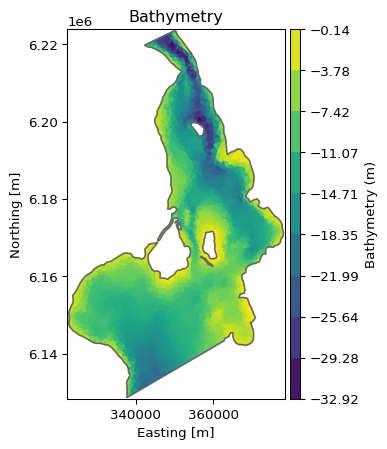

In [3]:
geom  = dfs.geometry
geom.plot();

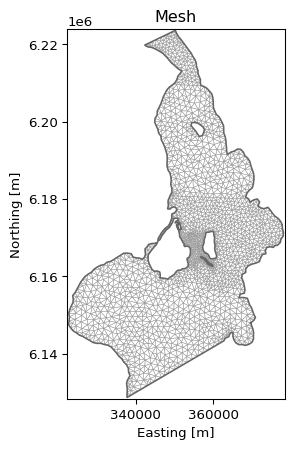

In [4]:
geom.plot.mesh();

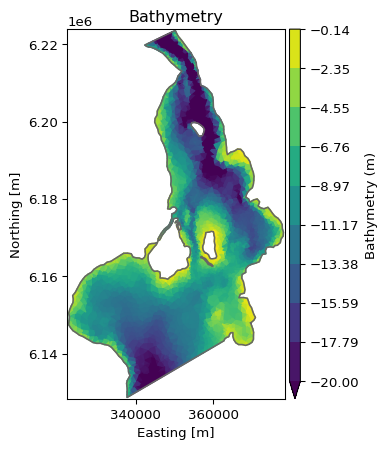

In [5]:
geom.plot(vmin=-20);

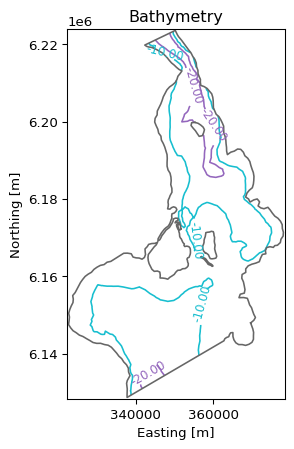

In [6]:
geom.plot.contour(levels=[-20,-10], cmap='tab10');

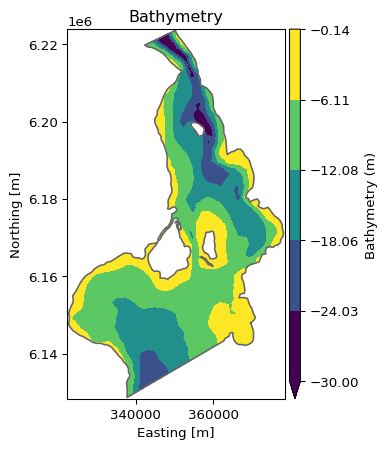

In [7]:
geom.plot.contourf(levels=6, vmin=-30);

### Data

The data can be visualized in a similar way.

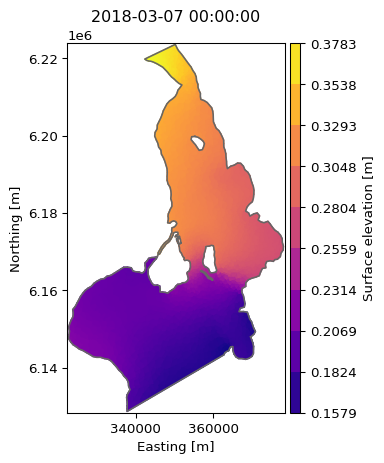

In [8]:
da = ds["Surface elevation"]
da.plot(cmap='plasma');

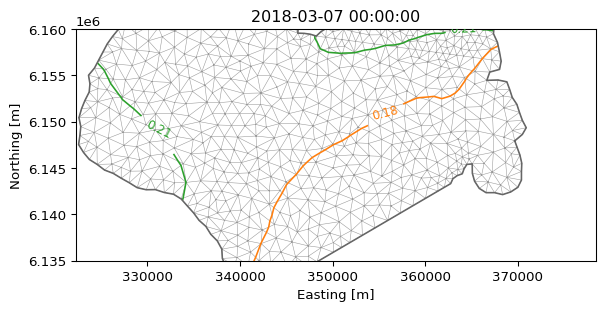

In [9]:
ax = da.plot.contour(show_mesh=True, cmap="tab20")
ax.set_ylim(6135000, 6160000);